# 주제 : ABC Bank 고객 이탈 예측

> 금융회사 특히 이번 주제인 은행에서 고객의 이탈을 방지하는 것은 매우 중요하다. 
고객 이탈을 줄여야 하는 주된 이유는 다음과 같다.
> 
- 은행은 고객이 예치한 돈으로 다른 개인고객 혹은 기업고객에게 대출을 해주면서 대출이자를 받는 예대마진의 수익구조를 기반으로 한다.
- 예대마진의 수익 이외로 은행 자체에서 재투자를 하여 비이자수익을 얻는다.
- 따라서 은행에 예치를 하는 고객을 최대한으로 유치해야하며 **기존의 고객들이 이탈하는 것을 방지하여야 한다.**
- 고객 이탈 방지가 중요한 또 다른 이유는 대부분의 사람들은 자산은 금융회사에 예치를 하기 때문에 회사에서 고객이 이탈하는 것은 다른 회사로 그 고객이 유입되는 것이기 때문에 산업 내 경쟁력을 높이는 측면에서도 의미를 가질 수 있다.

> 본 프로젝트에는 ABC Bank의 고객 이탈 데이터를 머신러닝 알고리즘으로 분석하는 것을 목적으로 한다.
> 
- ABC Bank의 경영전략 파트의 데이터 전문가
- 데이터 특징과 머신러닝 분류 알고리즘을 활용한 고객 이탈률 예측
- 고객 이탈에 주요한 영항을 미치는 특성 탐색 및 분석
- 특성을 보완하여 실질적인 방지책과 상품화를 고안

# 1. Import & Data Set

In [ ]:
!pip install category_encoders 
!pip install eli5 
!pip install pandas-profiling
!pip install --upgrade pandas-profiling 
!pip3 install pdpbox
!pip3 install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.7 MB/s 
     |████████████████████████████████| 133 kB 9.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=0c8d4d1189c3bbe12e7282b50a90d68e91dd64315db03488c88940aa349572b4
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 require

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from category_encoders import OrdinalEncoder
import eli5
from eli5.sklearn import PermutationImportance


In [ ]:
from google.colab import files
files.upload()

Saving Bank Customer Churn Prediction.csv to Bank Customer Churn Prediction.csv


{'Bank Customer Churn Prediction.csv': b'customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn\r\n15634602,619,France,Female,42,2,0,1,1,1,101348.88,1\r\n15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0\r\n15619304,502,France,Female,42,8,159660.8,3,1,0,113931.57,1\r\n15701354,699,France,Female,39,1,0,2,0,0,93826.63,0\r\n15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0\r\n15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1\r\n15592531,822,France,Male,50,7,0,2,1,1,10062.8,0\r\n15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1\r\n15792365,501,France,Male,44,4,142051.07,2,0,1,74940.5,0\r\n15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0\r\n15767821,528,France,Male,31,6,102016.72,2,0,0,80181.12,0\r\n15737173,497,Spain,Male,24,3,0,2,1,0,76390.01,0\r\n15632264,476,France,Female,34,10,0,2,1,0,26260.98,0\r\n15691483,549,France,Female,25,5,0,2,0,0,190857.79,0\r\n15600882,635,Spain,Female

In [ ]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 2. EDA & Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


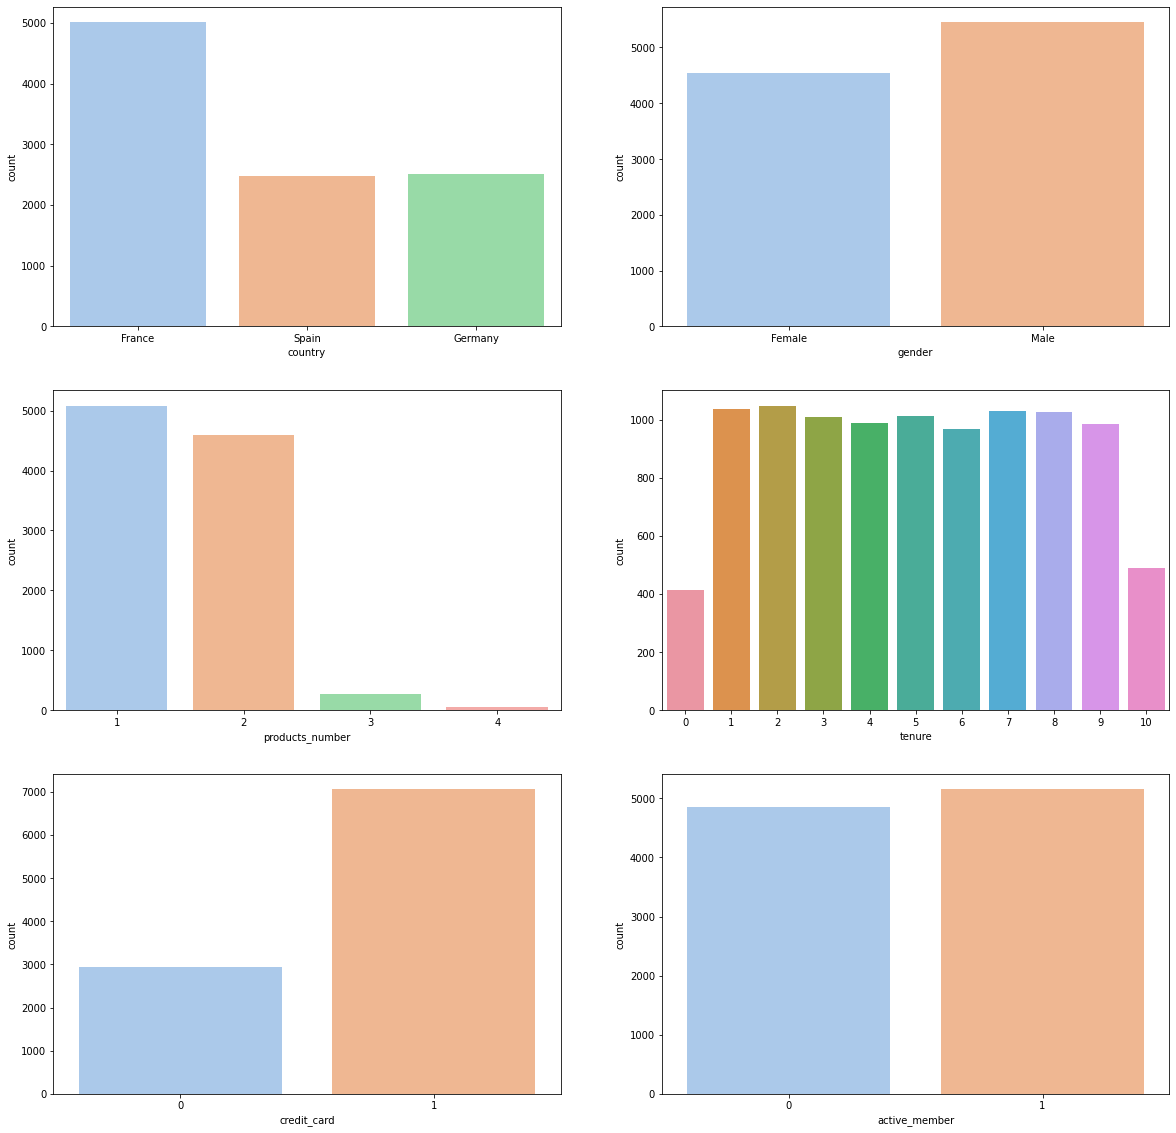

In [ ]:
# 카테고리 타입 특성 시각화
# country, gender, products_number,tenure,  credit_card, active_member
plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
sns.set_palette("pastel")
sns.countplot(x = 'country', data = df)

plt.subplot(3, 2, 2)
sns.set_palette("pastel")
sns.countplot(x = 'gender', data = df)

plt.subplot(3, 2, 3)
sns.set_palette("pastel")
sns.countplot(x = 'products_number', data = df)

plt.subplot(3, 2, 4)
sns.set_palette("pastel")
sns.countplot(x = 'tenure', data = df)

plt.subplot(3, 2, 5)
sns.set_palette("pastel")
sns.countplot(x = 'credit_card', data = df)

plt.subplot(3, 2, 6)
sns.set_palette("pastel")
sns.countplot(x = 'active_member', data = df)

plt.show()

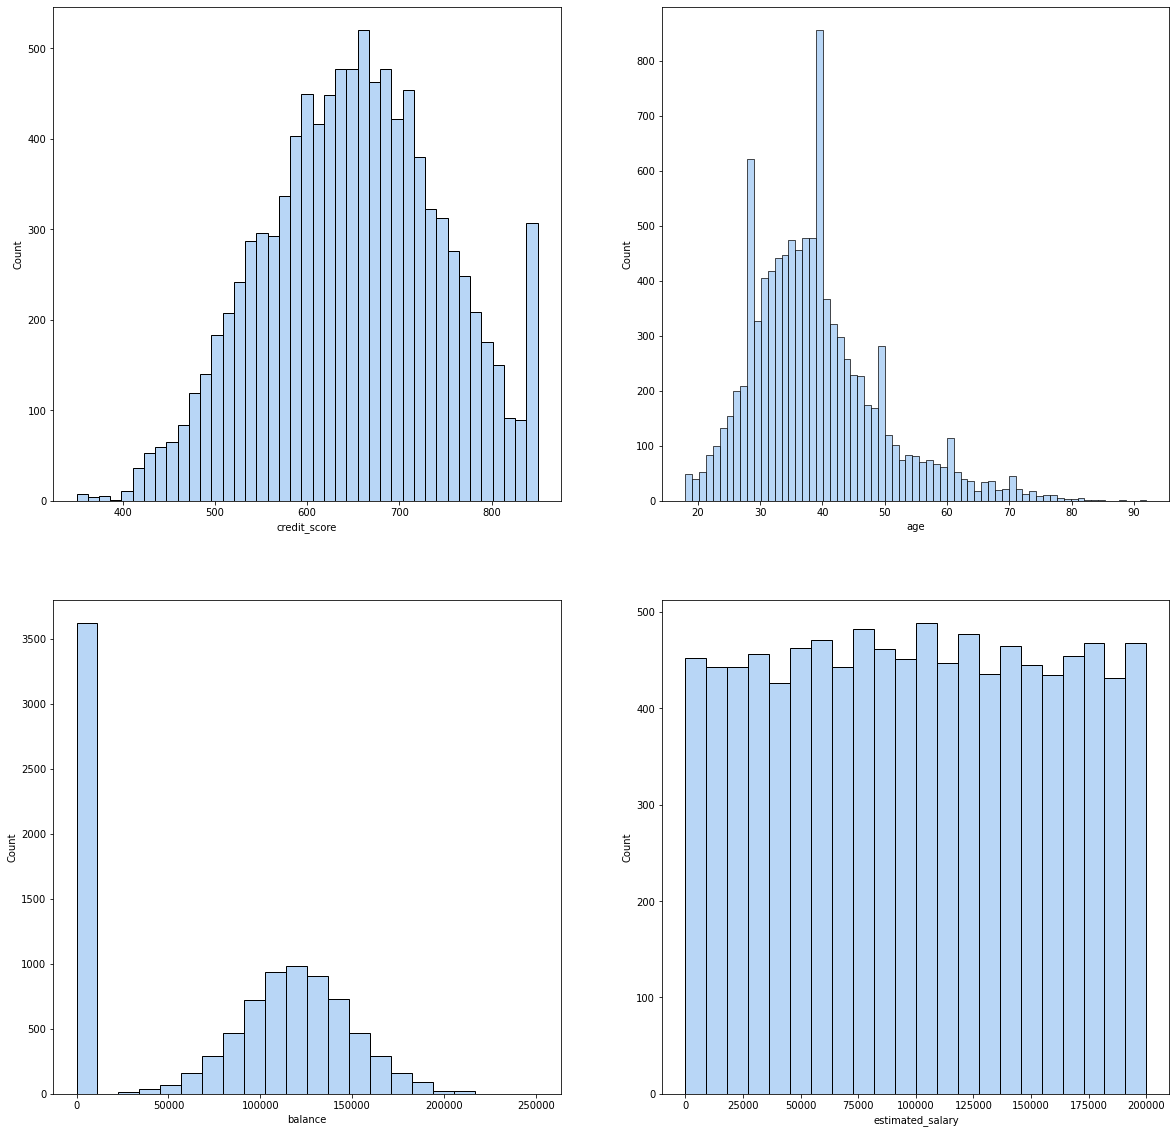

In [ ]:
# 수치 타입 특성 시각화
# credit_score, age, balance, estimated_salary
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.set_palette("pastel")
sns.histplot(x = 'credit_score', data = df)

plt.subplot(2, 2, 2)
sns.set_palette("pastel")
sns.histplot(x = 'age', data = df)

plt.subplot(2, 2, 3)
sns.set_palette("pastel")
sns.histplot(x = 'balance', data = df)

plt.subplot(2, 2, 4)
sns.set_palette("pastel")
sns.histplot(x = 'estimated_salary', data = df)

plt.show()

In [ ]:
# 새로운 컬럼 생성 

# 가입 나이
df['age_to_join'] = df['age'] - df['tenure']
df['age_to_join']

# 신용등급
df['credit_rating'] = pd.cut(df['credit_score'], bins=[0, 549, 649, 699, 749, 851], labels=['very pool', 'pool', 'fair', 'good', 'excellent'])
df['credit_rating'] = df['credit_rating'].astype('object')

In [ ]:
# 필요없는 컬럼 제거
df = df.drop(columns = 'customer_id', axis=1)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
 11  age_to_join       10000 non-null  int64  
 12  credit_rating     10000 non-null  object 
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB
None


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_to_join,credit_rating
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40,pool
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40,pool
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,34,very pool
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,38,fair
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41,excellent


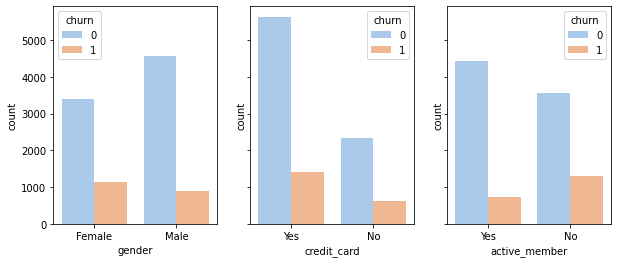

In [ ]:
credit_card = df["credit_card"].replace({0: "No", 1: "Yes"}, inplace=False)
active_member = df["active_member"].replace({0: "No", 1: "Yes"}, inplace=False)

_, axes = plt.subplots(1, 3, sharey=True, figsize=(10, 4))
sns.countplot(data=df, x="gender", hue='churn', ax=axes[0])
sns.countplot(data=df, x=credit_card, hue='churn', ax=axes[1])
sns.countplot(data=df, x=active_member, hue='churn', ax=axes[2]);

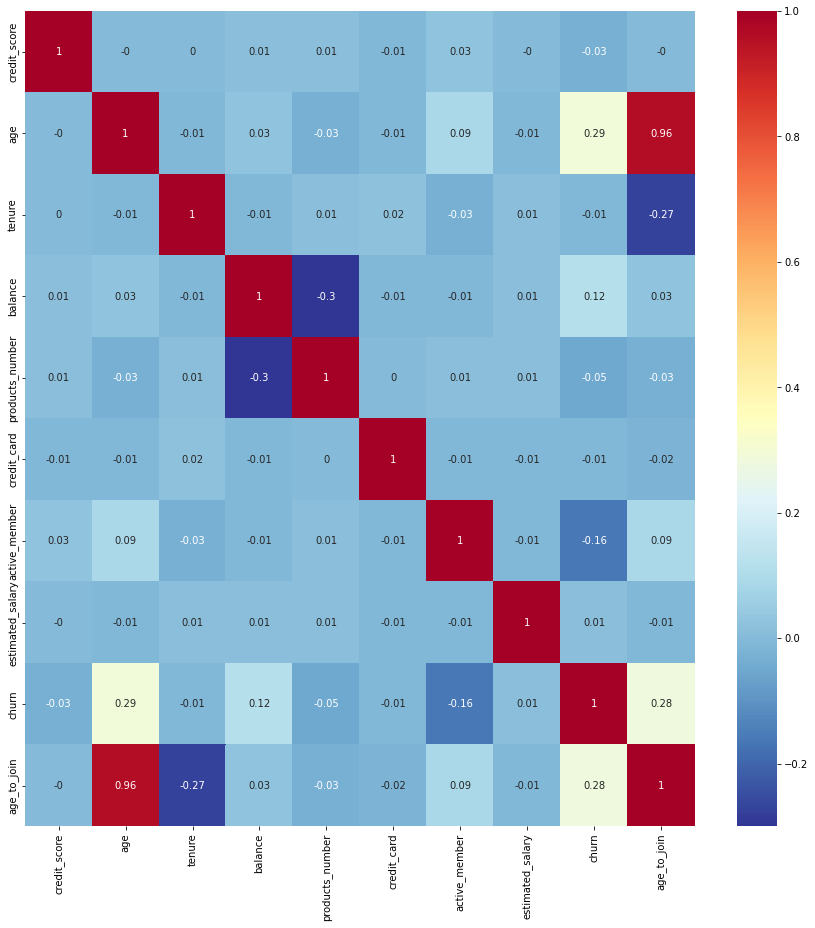

In [ ]:
# 특성간 상관계수 확인
correlation = df.corr().round(2)
plt.figure(figsize = (15,15))
sns.heatmap(correlation, annot = True, cmap = 'RdYlBu_r')
# 특성간 특별한 상관관계가 보이지 않는다.

타겟데이터의 비율
 0    0.7963
1    0.2037
Name: churn, dtype: float64


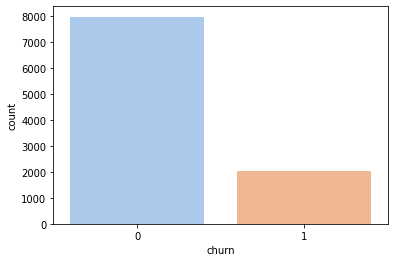

In [ ]:
# 타겟 비율 확인

y = df['churn']
print("타겟데이터의 비율\n",y.value_counts(normalize=True))

%matplotlib inline
sns.countplot(x=y);

# 3. Model

In [ ]:
# 학습 검증 평가 데이터 분리

target = 'churn'

y = df[target]
X = df.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, stratify=y_train)

print("X_train shape: ", X_train.shape)
print("X_val shape: ", X_val.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (5625, 12)
X_val shape:  (1875, 12)
X_test shape:  (2500, 12)


In [ ]:
# 기준모델

base = y_train.mode()[0]
baseline = [base] * len(y_train)
auc_baseline = roc_auc_score(y_train, baseline)
print(f'기준모델 AUC score : {auc_baseline}')

기준모델 AUC score : 0.5


## 3-1) Logistic

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 8448 to 5251
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      5625 non-null   int64  
 1   country           5625 non-null   object 
 2   gender            5625 non-null   object 
 3   age               5625 non-null   int64  
 4   tenure            5625 non-null   int64  
 5   balance           5625 non-null   float64
 6   products_number   5625 non-null   int64  
 7   credit_card       5625 non-null   int64  
 8   active_member     5625 non-null   int64  
 9   estimated_salary  5625 non-null   float64
 10  age_to_join       5625 non-null   int64  
 11  credit_rating     5625 non-null   object 
dtypes: float64(2), int64(7), object(3)
memory usage: 571.3+ KB


In [ ]:
# Ordinal encoding

ode = OrdinalEncoder()

X_train_ode = ode.fit_transform(X_train)
X_val_ode = ode.transform(X_val)
X_test_ode = ode.transform(X_test)

In [ ]:
# 학습
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression

logistic = LogisticRegression(class_weight='balanced')

logistic.fit(X_train_ode, y_train)
y_val_pred = logistic.predict(X_val_ode)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


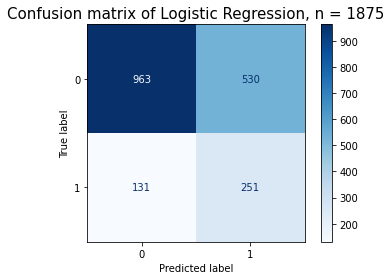

In [ ]:
# 검증 세트 confusion matrix
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(logistic, X_val_ode, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix of Logistic Regression, n = {len(y_val)}', fontsize=15)
plt.show()

In [ ]:
# 검증세트 평가
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score

print(classification_report(y_val, y_val_pred))

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
y_pred_proba = logistic.predict_proba(X_val_ode)[:,1]
auc = roc_auc_score(y_val, y_pred_proba)

print(f'accuracy of logistic regression is {accuracy.round(2)}')
print(f'precision of logistic regression is {precision.round(2)}')
print(f'recall of logistic regression is {recall.round(2)}')
print(f'f1 of logistic regression is {f1.round(2)}')
print(f"Logistic Regression의 auc score : {auc.round(3)}")

              precision    recall  f1-score   support

           0       0.88      0.65      0.74      1493
           1       0.32      0.66      0.43       382

    accuracy                           0.65      1875
   macro avg       0.60      0.65      0.59      1875
weighted avg       0.77      0.65      0.68      1875

accuracy of logistic regression is 0.65
precision of logistic regression is 0.32
recall of logistic regression is 0.66
f1 of logistic regression is 0.43
Logistic Regression의 auc score : 0.696


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


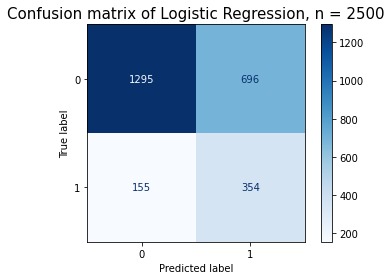

In [ ]:
# 평가 세트 confusion matrix
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(logistic, X_test_ode, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix of Logistic Regression, n = {len(y_test)}', fontsize=15)
plt.show()

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve
y_test_pred_proda = logistic.predict_proba(X_test_ode)[:,1]
# 데이터의 class가 아닌 예측된 확률을 얻고자 한다면 
# .predict_proba() 함수에 동일한 파라미터를 전달하면 된다. 이 함수는 0 과 1 사이의 예측된 확률값을 반환

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proda) # roc_curve(타겟, 확률)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPR(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPR(Recall),Threshold
0,0.000000,0.000000,1.961819
1,0.000000,0.001965,0.961819
2,0.001005,0.001965,0.917965
3,0.001005,0.003929,0.917438
4,0.006027,0.003929,0.882871
...,...,...,...
674,0.990457,0.996071,0.162936
675,0.990457,0.998035,0.161497
676,0.992466,0.998035,0.153489
677,0.992466,1.000000,0.152928


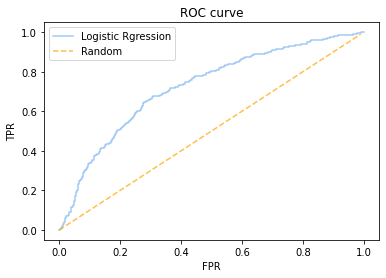

In [ ]:
# ROC curve 그리기

plt.plot(fpr, tpr, label='Logistic Rgression')
x = np.arange(0, 1.0, 0.01)
y = np.arange(0, 1.0, 0.01)
plt.plot(x, y, linestyle='--', color = 'orange', alpha=0.7, label='Random')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [ ]:
# 평가세트 평가
y_test_pred = logistic.predict(X_test_ode)

print(classification_report(y_test, y_test_pred))

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
y_test_pred_proba = logistic.predict_proba(X_test_ode)[:,1]
auc = roc_auc_score(y_test, y_test_pred_proba)

print(f'accuracy of logistic regression is {accuracy.round(2)}')
print(f'precision of logistic regression is {precision.round(2)}')
print(f'recall of logistic regression is {recall.round(2)}')
print(f'f1 of logistic regression is {f1.round(2)}')
print(f"Logistic Regression의 auc score : {auc.round(3)}")

              precision    recall  f1-score   support

           0       0.89      0.65      0.75      1991
           1       0.34      0.70      0.45       509

    accuracy                           0.66      2500
   macro avg       0.62      0.67      0.60      2500
weighted avg       0.78      0.66      0.69      2500

accuracy of logistic regression is 0.66
precision of logistic regression is 0.34
recall of logistic regression is 0.7
f1 of logistic regression is 0.45
Logistic Regression의 auc score : 0.723


## 3-2) RandomForest

In [ ]:
# 파이프라인

pipe_rf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(bootstrap=True, 
                           random_state=42, 
                           oob_score=True, 
                           n_jobs=-1,
                           class_weight= 'balanced'),
)

In [ ]:
params = {
    'randomforestclassifier__max_depth' : [3,5,10,15],
    'randomforestclassifier__max_features' : [3,5,10],
    'randomforestclassifier__n_estimators' : [80, 100, 150, 200],
    "randomforestclassifier__min_samples_split": [3, 5, 7, 9]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

randomized_search = RandomizedSearchCV(
    pipe_rf,
    param_distributions = params,
    scoring = 'roc_auc',
    n_iter = 10,
    cv = 3,
    verbose = 3,
    random_state = 42
)
randomized_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END randomforestclassifier__max_depth=3, randomforestclassifier__max_features=10, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=100;, score=0.834 total time=   2.0s
[CV 2/3] END randomforestclassifier__max_depth=3, randomforestclassifier__max_features=10, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=100;, score=0.819 total time=   0.7s
[CV 3/3] END randomforestclassifier__max_depth=3, randomforestclassifier__max_features=10, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=100;, score=0.818 total time=   0.7s
[CV 1/3] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=10, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=80;, score=0.848 total time=   1.0s
[CV 2/3] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=10, randomf

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('simpleimputer', SimpleImputer()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(class_weight='balanced',
                                                                     n_jobs=-1,
                                                                     oob_score=True,
                                                                     random_state=42))]),
                   param_distributions={'randomforestclassifier__max_depth': [3,
                                                                              5,
                                                                              10,
                                                                              15],
                 

In [ ]:
print("최적 하이퍼파라미터: ", randomized_search.best_params_)
print("최적 AUC: ", randomized_search.best_score_)

최적 하이퍼파라미터:  {'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__min_samples_split': 9, 'randomforestclassifier__max_features': 10, 'randomforestclassifier__max_depth': 10}
최적 AUC:  0.8501962035747975


In [ ]:
pipe_rf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators = 200, 
                           max_depth = 10,
                           min_samples_split = 9,
                           max_features = 10, 
                           bootstrap=True, 
                           random_state=42, 
                           oob_score=True, 
                           n_jobs=-1,
                           class_weight= 'balanced')

)
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['country', 'gender', 'credit_rating'],
                                mapping=[{'col': 'country',
                                          'data_type': dtype('O'),
                                          'mapping': France     1
Spain      2
Germany    3
NaN       -2
dtype: int64},
                                         {'col': 'gender',
                                          'data_type': dtype('O'),
                                          'mapping': Male      1
Female    2
NaN      -2
dtype: int64},
                                         {'col': 'credit_rating',
                                          'data_type': dtype('O'),
                                          'mapping': very pool    1
pool         2
fair         3
good         4
excellent    5
NaN         -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 Rando

In [ ]:
y_pred = pipe_rf.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1493
           1       0.59      0.65      0.62       382

    accuracy                           0.84      1875
   macro avg       0.75      0.77      0.76      1875
weighted avg       0.84      0.84      0.84      1875



In [ ]:
y_test_pred = pipe_rf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1991
           1       0.61      0.66      0.64       509

    accuracy                           0.85      2500
   macro avg       0.76      0.78      0.77      2500
weighted avg       0.85      0.85      0.85      2500



In [ ]:
cv_score = cross_val_score(pipe_rf, X_train, y_train,
    cv=10, n_jobs=-1, scoring='roc_auc').mean()
print("Random Forest Model AUC Score:", round(cv_score, 2))

Random Forest Model AUC Score: 0.85


In [ ]:
cv_score = cross_val_score(pipe_rf, X_test, y_test,
    cv=10, n_jobs=-1, scoring='roc_auc').mean()
print("Random Forest Model  Test AUC Score:", round(cv_score, 2))

Random Forest Model  Test AUC Score: 0.86


In [ ]:
rf = pipe_rf.named_steps['randomforestclassifier']
permuter = PermutationImportance(rf, 
                                 scoring='roc_auc',
                                 n_iter=5, 
                                 random_state=42)

permuter.fit(X_test_ode, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

PermutationImportance(estimator=RandomForestClassifier(class_weight='balanced',
                                                       max_depth=10,
                                                       max_features=10,
                                                       min_samples_split=9,
                                                       n_estimators=200,
                                                       n_jobs=-1,
                                                       oob_score=True,
                                                       random_state=42),
                      random_state=42, scoring='roc_auc')

In [ ]:
eli5.show_weights(permuter, feature_names = X_test.columns.tolist(),
                  top=None)

Weight,Feature
0.1286 ± 0.0178,products_number
0.0863 ± 0.0161,age
0.0560 ± 0.0043,balance
0.0302 ± 0.0136,active_member
0.0289 ± 0.0076,country
0.0074 ± 0.0031,gender
0.0071 ± 0.0039,age_to_join
0.0006 ± 0.0005,credit_card
-0.0008 ± 0.0009,estimated_salary
-0.0008 ± 0.0022,credit_score


Text(0.5, 1.0, 'Permutation Importance')

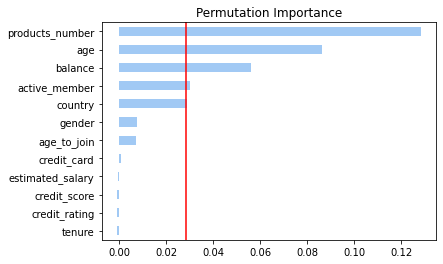

In [ ]:
feature_names = X_test.columns.tolist()
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values()
pi.plot.barh()
plt.axvline(pi.mean(), color='red')
plt.title("Permutation Importance")

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f78a93a0210>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f78a93a0610>})

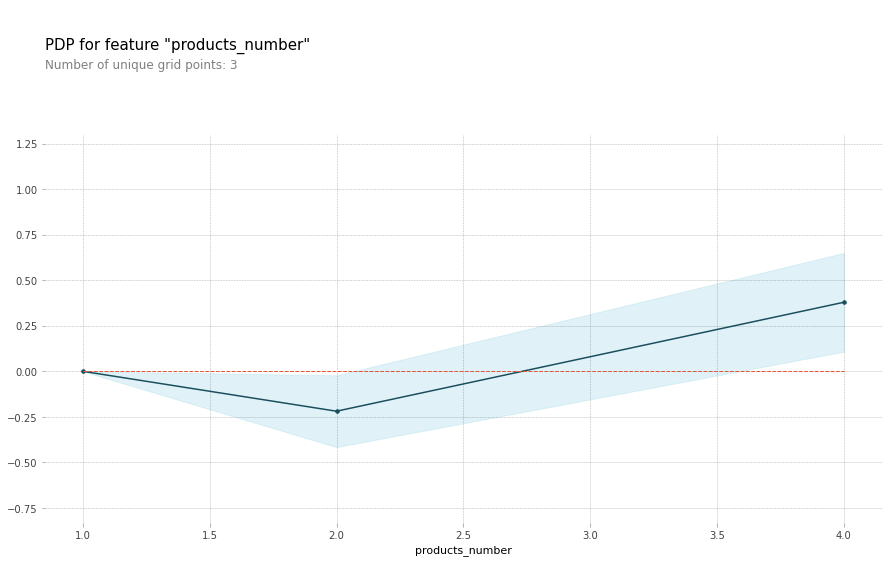

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

target_feature = "products_number"

isolated = pdp_isolate(
    model=pipe_rf[2],
    dataset=X_test_ode,
    model_features=X_test.columns,
    feature=target_feature,
    grid_type='percentile', 
    num_grid_points=20
)
pdp_plot(isolated, feature_name=target_feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f78a9727050>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f78a96c5990>})

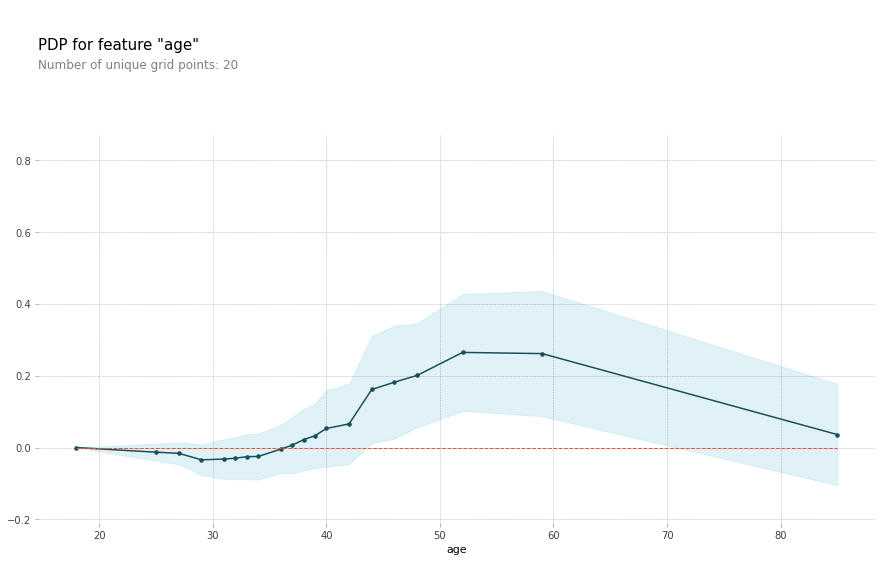

In [ ]:
target_feature = "age"

isolated = pdp_isolate(
    model=pipe_rf[2],
    dataset=X_test_ode,
    model_features=X_test.columns,
    feature=target_feature,
    grid_type='percentile', 
    num_grid_points=20
)
pdp_plot(isolated, feature_name=target_feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f78a9860f90>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f78a98b5ed0>})

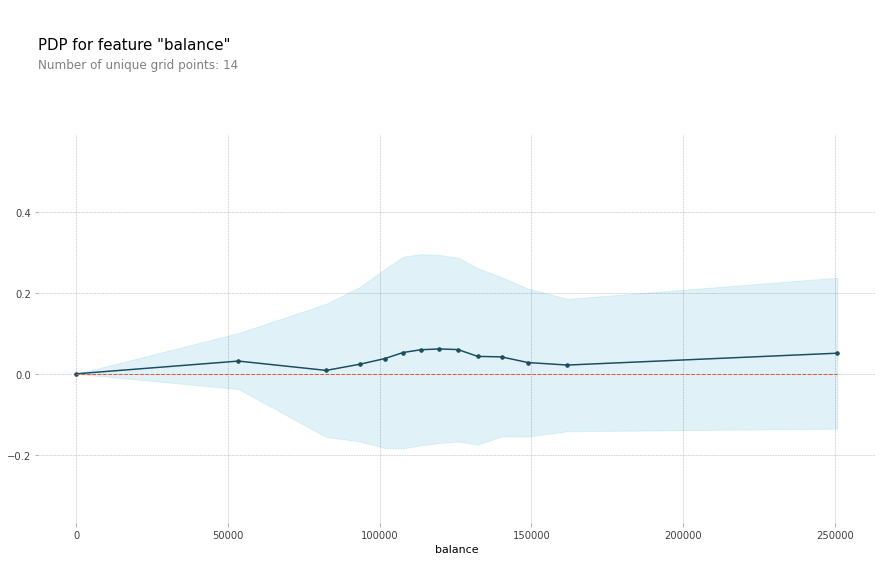

In [ ]:
target_feature = "balance"

isolated = pdp_isolate(
    model=pipe_rf[2],
    dataset=X_test_ode,
    model_features=X_test.columns,
    feature=target_feature,
    grid_type='percentile', 
    num_grid_points=20
)
pdp_plot(isolated, feature_name=target_feature)

## 3-2) XGBoost

In [ ]:
pipe_xgb = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        n_estimators=10000,
        random_state=42,
        n_jobs=-1,
        scale_pos_weight=(y_val == 0).sum() / (y_val == 1).sum(),
)
)

In [ ]:
from scipy.stats.distributions import uniform

params = {
    "xgbclassifier__max_depth": [3,5,10,15],
    "xgbclassifier__min_samples_split": [3, 5, 7, 9],
    "xgbclassifier__learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
    "xgbclassifier__min_child_weight": [2, 4, 8],
    "xgbclassifier__colsample_bytree": uniform(loc=0.5, scale=0.5) 
}

In [ ]:
randomized_search = RandomizedSearchCV(
    pipe_xgb,
    param_distributions=params,
    scoring="roc_auc",
    n_iter=10,
    cv=3,
    verbose=3,
    random_state=42,
)
randomized_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END xgbclassifier__colsample_bytree=0.6872700594236812, xgbclassifier__learning_rate=0.25, xgbclassifier__max_depth=10, xgbclassifier__min_child_weight=8, xgbclassifier__min_samples_split=9;, score=0.814 total time=  20.6s
[CV 2/3] END xgbclassifier__colsample_bytree=0.6872700594236812, xgbclassifier__learning_rate=0.25, xgbclassifier__max_depth=10, xgbclassifier__min_child_weight=8, xgbclassifier__min_samples_split=9;, score=0.786 total time=  21.3s
[CV 3/3] END xgbclassifier__colsample_bytree=0.6872700594236812, xgbclassifier__learning_rate=0.25, xgbclassifier__max_depth=10, xgbclassifier__min_child_weight=8, xgbclassifier__min_samples_split=9;, score=0.792 total time=  19.1s
[CV 1/3] END xgbclassifier__colsample_bytree=0.7993292420985183, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=10, xgbclassifier__min_child_weight=8, xgbclassifier__min_samples_split=7;, score=0.819 total time=  24.2s
[CV 2/3] END

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('simpleimputer', SimpleImputer()),
                                             ('xgbclassifier',
                                              XGBClassifier(eval_metric='auc',
                                                            n_estimators=10000,
                                                            n_jobs=-1,
                                                            random_state=42,
                                                            scale_pos_weight=3.9083769633507854))]),
                   param_distributions={'xgbclassifier__colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f78a9b13e10>,
                                        'xgbclassifier__learning_rate': [0.05,
                                                                    

In [ ]:
print("최적 하이퍼파라미터: ", randomized_search.best_params_)
print("최적 AUC: ", randomized_search.best_score_)

최적 하이퍼파라미터:  {'xgbclassifier__colsample_bytree': 0.5852620618436457, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 15, 'xgbclassifier__min_child_weight': 2, 'xgbclassifier__min_samples_split': 9}
최적 AUC:  0.8117860077686562


In [ ]:
model_xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    n_estimators=10000,
    colsample_bytree=0.59,
    max_depth=15,
    min_child_weight=2,
    min_samples_split=9,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=(y_val == 0).sum() / (y_val == 1).sum()
)

watchlist = [(X_train_ode, y_train), (X_val_ode, y_val)]

model_xgb.fit(
    X_train_ode,
    y_train,
    eval_set=watchlist,
    early_stopping_rounds=50, 
)

[0]	validation_0-auc:0.920235	validation_1-auc:0.707881
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.975361	validation_1-auc:0.786946
[2]	validation_0-auc:0.986288	validation_1-auc:0.779879
[3]	validation_0-auc:0.991844	validation_1-auc:0.803395
[4]	validation_0-auc:0.992689	validation_1-auc:0.817404
[5]	validation_0-auc:0.991592	validation_1-auc:0.825438
[6]	validation_0-auc:0.993084	validation_1-auc:0.826405
[7]	validation_0-auc:0.993774	validation_1-auc:0.833333
[8]	validation_0-auc:0.995142	validation_1-auc:0.833028
[9]	validation_0-auc:0.996078	validation_1-auc:0.834531
[10]	validation_0-auc:0.996229	validation_1-auc:0.838378
[11]	validation_0-auc:0.99669	validation_1-auc:0.836314
[12]	validation_0-auc:0.997195	validation_1-auc:0.839721
[13]	validation_0-auc:0.9972	validation_1-auc:0.840876
[14]	validation_0-auc:0.997153	validation_1-auc:0.84268
[1

XGBClassifier(colsample_bytree=0.59, eval_metric='auc', max_depth=15,
              min_child_weight=2, min_samples_split=9, n_estimators=10000,
              n_jobs=-1, random_state=42, scale_pos_weight=3.9083769633507854)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = model_xgb.predict_proba(X_val_ode)[:, 1]
print("XGBoost 검증 AUC Score:", roc_auc_score(y_val, y_pred_proba))
print(classification_report(y_val, model_xgb.predict(X_val_ode)))

XGBoost 검증 AUC Score: 0.852491382121804
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1493
           1       0.61      0.59      0.60       382

    accuracy                           0.84      1875
   macro avg       0.75      0.75      0.75      1875
weighted avg       0.84      0.84      0.84      1875



In [ ]:
y_test_pred_proba = model_xgb.predict_proba(X_test_ode)[:, 1]
print("XGBoost 평가 AUC Score:", roc_auc_score(y_test, y_test_pred_proba))
print(classification_report(y_test, model_xgb.predict(X_test_ode)))

XGBoost 평가 AUC Score: 0.8510152266732713
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1991
           1       0.64      0.59      0.61       509

    accuracy                           0.85      2500
   macro avg       0.77      0.75      0.76      2500
weighted avg       0.85      0.85      0.85      2500



In [ ]:
permuter_xgb = PermutationImportance(model_xgb, 
                                 scoring='roc_auc',
                                 n_iter=5, 
                                 random_state=42)

permuter_xgb.fit(X_test_ode, y_test)

PermutationImportance(estimator=XGBClassifier(colsample_bytree=0.59,
                                              eval_metric='auc', max_depth=15,
                                              min_child_weight=2,
                                              min_samples_split=9,
                                              n_estimators=10000, n_jobs=-1,
                                              random_state=42,
                                              scale_pos_weight=3.9083769633507854),
                      random_state=42, scoring='roc_auc')

In [ ]:
eli5.show_weights(permuter_xgb, feature_names = X_test.columns.tolist(),
                  top=None)

Weight,Feature
0.1022 ± 0.0119,products_number
0.0495 ± 0.0160,age
0.0319 ± 0.0084,active_member
0.0313 ± 0.0064,balance
0.0271 ± 0.0044,country
0.0201 ± 0.0067,age_to_join
0.0078 ± 0.0038,gender
0.0003 ± 0.0057,estimated_salary
-0.0004 ± 0.0013,credit_rating
-0.0008 ± 0.0025,tenure


Text(0.5, 1.0, 'Permutation Importance')

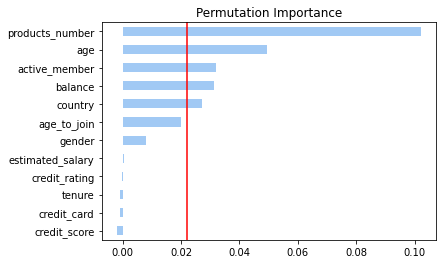

In [ ]:
feature_names = X_test.columns.tolist()
pi = pd.Series(permuter_xgb.feature_importances_, feature_names).sort_values()
pi.plot.barh()
plt.axvline(pi.mean(), color='red')
plt.title("Permutation Importance")

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f78aa096b90>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f78a9b5d150>})

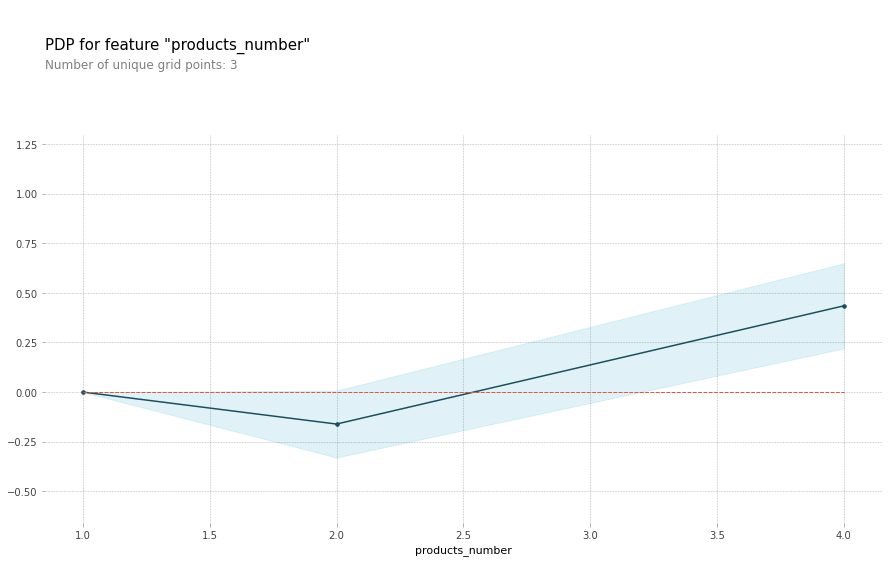

In [ ]:
target_feature = "products_number"

isolated = pdp_isolate(
    model=model_xgb,
    dataset=X_test_ode,
    model_features=X_test.columns,
    feature=target_feature,
    grid_type='percentile', 
    num_grid_points=20
)
pdp_plot(isolated, feature_name=target_feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f78a9fbca50>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f78aa130750>})

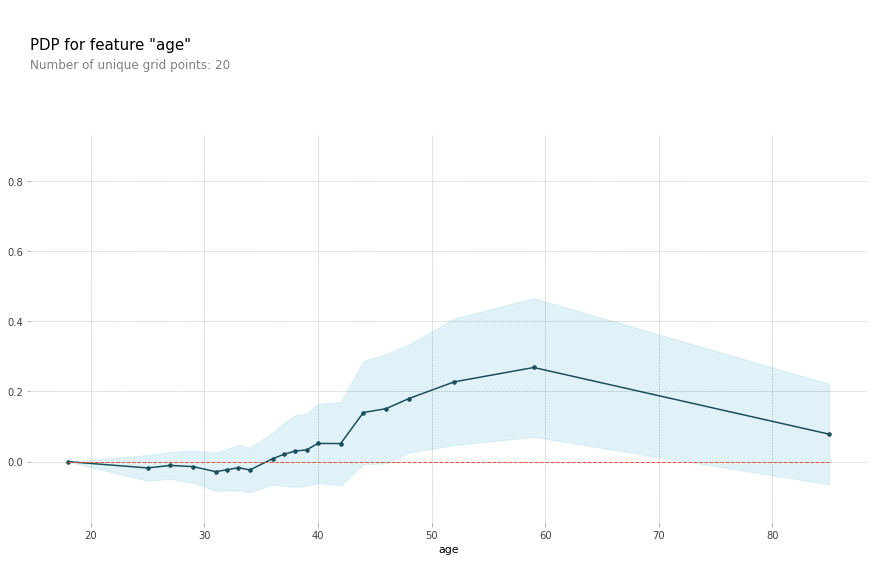

In [ ]:
target_feature = "age"

isolated = pdp_isolate(
    model=model_xgb,
    dataset=X_test_ode,
    model_features=X_test.columns,
    feature=target_feature,
    grid_type='percentile', 
    num_grid_points=20
)
pdp_plot(isolated, feature_name=target_feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f78ac3f3690>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f78a98d6890>})

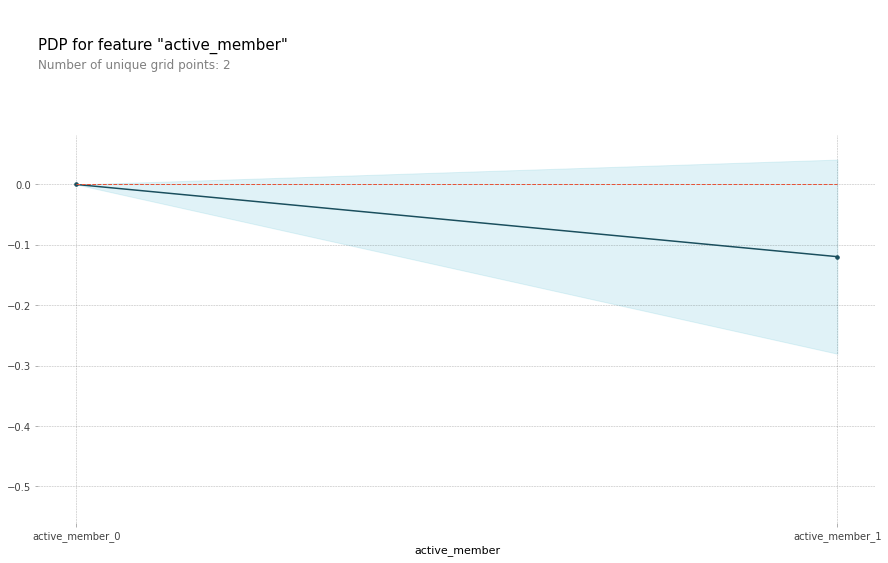

In [ ]:
target_feature = "active_member"

isolated = pdp_isolate(
    model=model_xgb,
    dataset=X_test_ode,
    model_features=X_test.columns,
    feature=target_feature,
    grid_type='percentile', 
    num_grid_points=20
)
pdp_plot(isolated, feature_name=target_feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f78a9aed810>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f78a98d6b50>})

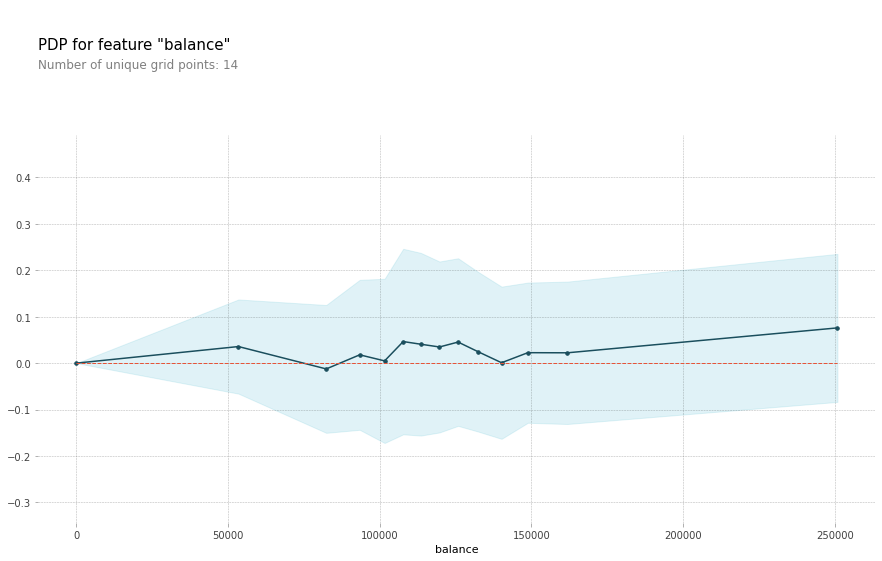

In [ ]:
target_feature = "balance"

isolated = pdp_isolate(
    model=model_xgb,
    dataset=X_test_ode,
    model_features=X_test.columns,
    feature=target_feature,
    grid_type='percentile', 
    num_grid_points=20
)
pdp_plot(isolated, feature_name=target_feature)

# 4) 특성중요도 기준 시각화


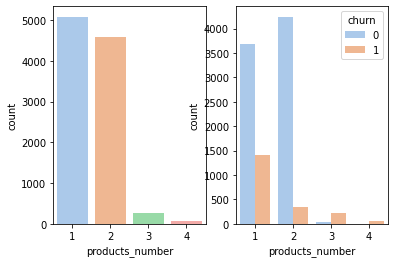

In [ ]:
plt.subplot(1, 2, 1)
sns.set_palette("pastel")
sns.countplot(x = 'products_number', data = df)

plt.subplot(1, 2, 2)
sns.countplot(x = 'products_number', hue= 'churn', palette='pastel', data = df)

In [ ]:
df.groupby("products_number")['churn'].value_counts().unstack()

churn,0,1
products_number,,
1,3675.0,1409.0
2,4242.0,348.0
3,46.0,220.0
4,NaN,60.0


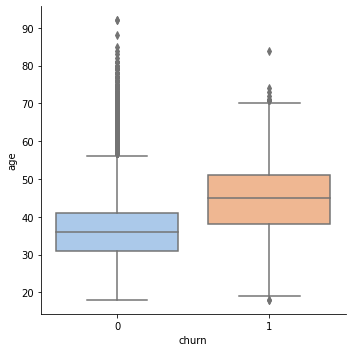

In [ ]:
sns.catplot(x = 'churn', y="age", kind="box", data = df)

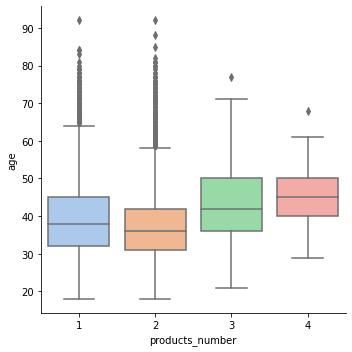

In [ ]:
sns.catplot(x = 'products_number', y="age", kind="box", data = df)

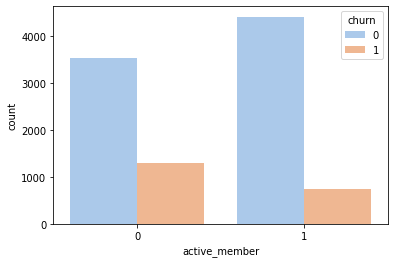

In [ ]:
sns.countplot(x = 'active_member', hue= 'churn', palette='pastel', data = df)

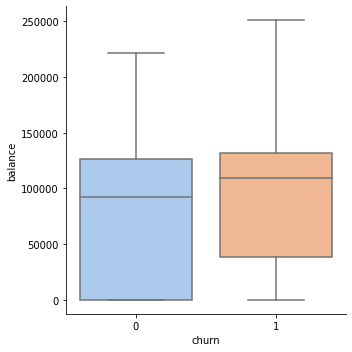

In [ ]:
sns.catplot(x = 'churn', y="balance", kind="box", data = df)

In [ ]:
features = df.keys()
features = features.drop(["churn", "credit_card", "active_member"])
df.groupby("churn")[features].mean()

,credit_score,age,tenure,balance,products_number,estimated_salary,age_to_join
churn,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,99738.391772,32.375110
1,645.351497,44.837997,4.932744,91108.539337,1.475209,101465.677531,39.905253
